In [1]:
from nbodykit.lab import *
from nbodykit import style, setup_logging
import matplotlib.pyplot as plt
plt.style.use(style.notebook)
import numpy as np
import nbodykit as nb

In [2]:
import momentum as m

In [25]:
#强制重载
import importlib
importlib.reload(m)

<module 'momentum' from '/Raid6/1/TeamYZ/xiting/momentum/momentum.py'>

In [23]:
#12
#计算无权重
num = '12_bin'
cat_nw = m.data_read(num)
m.test(cat_nw)
#加红移
cat_nw = m.RED(cat_nw)
m.test(cat_nw)
#加权重
cat_nw['weight'] = 1
#计算矩阵
r00_nw, r01_nw, r11_nw, P00_nw, P01_nw, P11_nw = m.momentum(cat_nw)

列 'RsdPos_x' 不存在
列 'RsdPos_x' 存在


In [20]:
print(np.array(cat_nw['RsdPos_x'][:10]))

[[ 5.51550322 14.16417217  2.47294474]
 [ 5.50615146 14.08747673  2.5375526 ]
 [ 5.47477605 14.13674259  2.47648025]
 [ 5.49226624 14.16453266  2.4731276 ]
 [ 5.51569643 14.17055798  2.45641851]
 [ 5.49189099 14.1622839   2.47827077]
 [ 5.43212296 14.03184223  2.49699545]
 [ 5.44536602 14.00998783  2.51261783]
 [ 5.4993173  14.07562447  2.54303885]
 [ 5.55771495 14.15307999  2.48390603]]


In [21]:
print(np.array(cat_nw['vel_x'][:10]))

[[ 0.34688357 -0.          0.        ]
 [ 1.14141491  0.         -0.        ]
 [ 3.04844693 -0.          0.        ]
 [-1.53648615 -0.          0.        ]
 [ 0.34155491 -0.          0.        ]
 [-1.46076686 -0.          0.        ]
 [ 1.81378304  0.          0.        ]
 [ 1.62672892  0.          0.        ]
 [ 1.61518084  0.         -0.        ]
 [ 3.68393592 -0.          0.        ]]


In [5]:
#12
#有权重
cat = m.data_read(num)
#加红移
cat = m.RED(cat)
#加权重
cat = m.weight(cat)
#计算矩阵
r00, r01, r11, P00, P01, P11 = m.momentum(cat)


In [6]:
# #12.5
# #计算无权重
# num12 = '12_bin'
# cat12_nw = m.data_read(num12)
# #加红移
# cat12_nw = m.RED(cat12_nw)
# #加权重
# cat12_nw['weight'] = 1
# #计算矩阵
# r00_12_nw, r01_12_nw, r11_12_nw, P00_12_nw, P01_12_nw, P11_12_nw = m.momentum(cat12_nw)

In [7]:
# #12.5
# #有权重
# cat12 = m.data_read(num12)
# #加红移
# cat12 = m.RED(cat12)
# #加权重
# cat12 = m.weight(cat12)
# #计算矩阵
# r00_12, r01_12, r11_12, P00_12, P01_12, P11_12 = m.momentum(cat12)

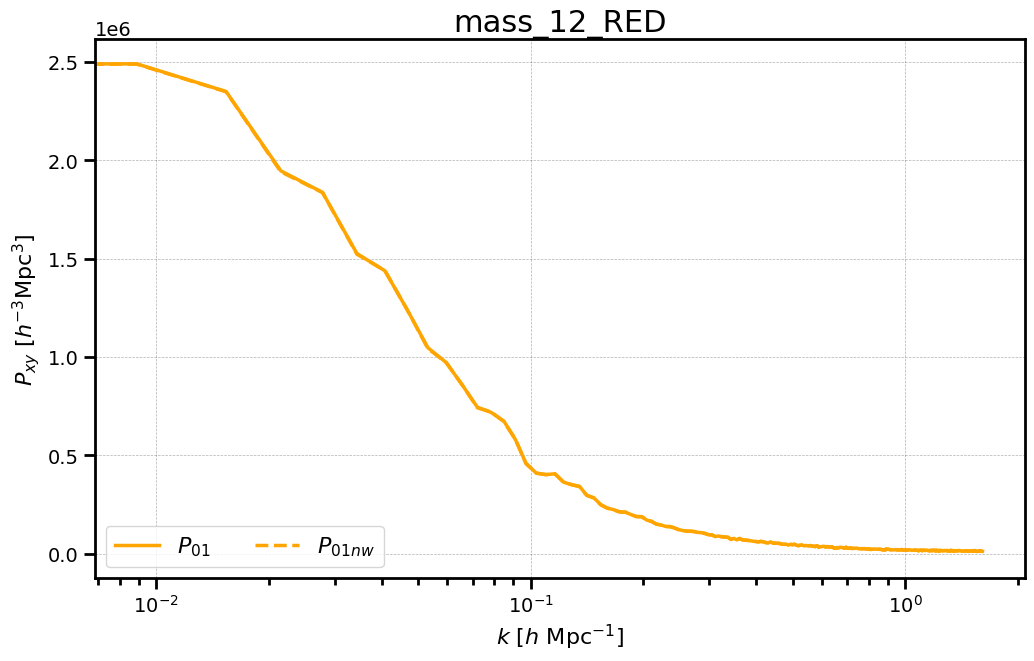

In [8]:
plt.loglog(r01.power['k'], P01, label=r"$P_{01}$", color='orange')
plt.loglog(r01_nw.power['k'], P01_nw, label=r"$P_{01nw}$", linestyle='--', color='orange')
plt.title("mass_12_RED")
plt.legend(loc='lower left', ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P_{xy}$ [$h^{-3} \mathrm{Mpc}^3$]")
# plt.xlim(0.01, 0.6)
# # plt.xscale('linear')
plt.yscale('linear')

<BinnedStatistic: dims: (k: 320), variables: ('k', 'power_2', 'power_4', 'modes')>
variables =  ['k', 'power_2', 'power_4', 'modes']


Text(0.5, 1.0, 'RSD_nw')

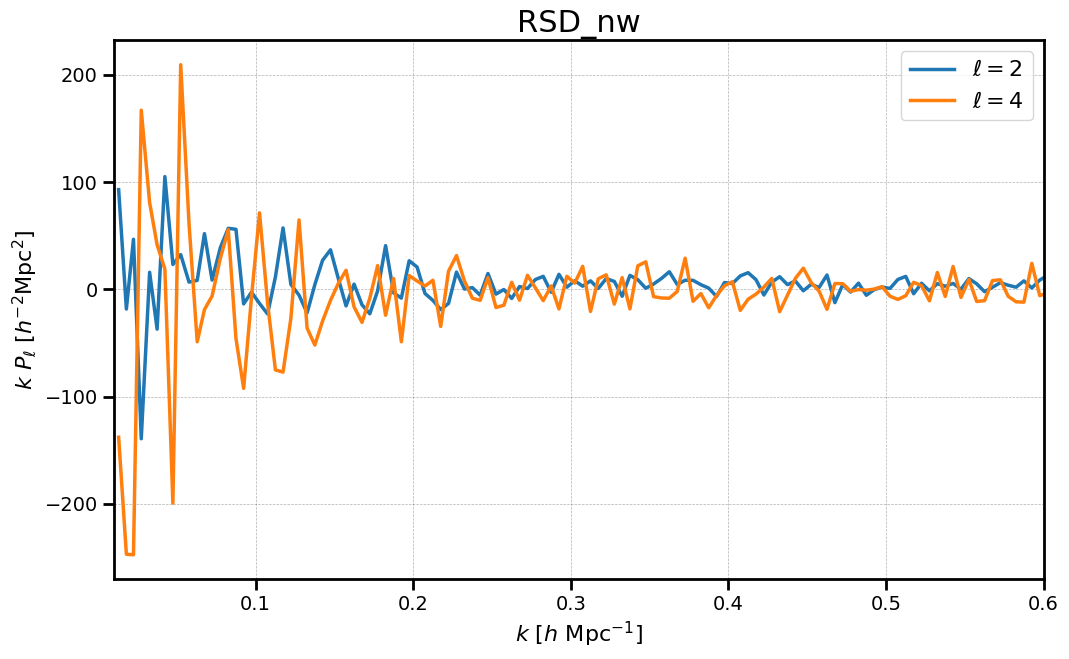

In [24]:
m.density(cat_nw)
# lines = plt.gca().get_lines()
# for line in lines:
#     line.set_linestyle('--')
#     line.set_color('')

plt.xlim(0.01, 0.6)
plt.title('RSD_nw')

<BinnedStatistic: dims: (k: 320), variables: ('k', 'power_2', 'power_4', 'modes')>
variables =  ['k', 'power_2', 'power_4', 'modes']


Text(0.5, 1.0, 'RSD_w')

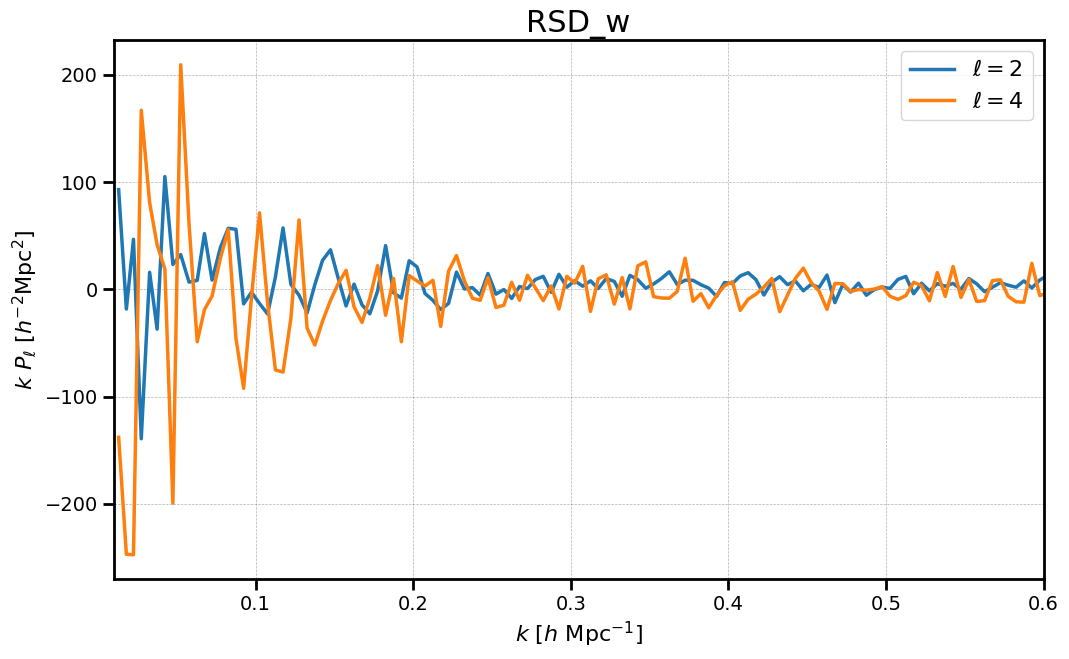

In [14]:
m.density(cat)
plt.xlim(0.01, 0.6)
plt.title('RSD_w')

In [26]:
redshift = 0.55
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')
b1 = 2.0

cat = LogNormalCatalog(Plin=Plin, nbar=3e-4, BoxSize=1380., Nmesh=256, bias=b1, seed=42)

In [29]:
cat

LogNormalCatalog(seed=42, bias=2)

In [28]:
# cat_nw = m.data_read(cat)
# m.test(cat)
#加红移
cat_nw = m.RED(cat)
m.test(cat_nw)
#加权重
cat_nw['weight'] = 1
#计算矩阵
# r00_nw, r01_nw, r11_nw, P00_nw, P01_nw, P11_nw = m.momentum(cat_nw)

列 'RsdPos_x' 不存在


KeyError: 'column `Vel` is not defined in this source; try adding column via `source[column] = data`'